In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Duplicate key in file WindowsPath('d:/source/Anaconda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  Microsoft JhengHei')


In [20]:
共同存檔_df = pd.read_csv("datas/2024-10-22--03點14分_ib_sj共同存檔.csv")
共同存檔_df = 共同存檔_df.ffill()
# 共同存檔_df.index = 共同存檔_df["datetime"]
共同存檔_df["datetime"] = pd.to_datetime(共同存檔_df["datetime"])
共同存檔_df

,Unnamed: 0,datetime,bid_SJ,ask_SJ,bid_IB,ask_IB
0,3226,2024-10-22 02:19:05.992058,NaN,NaN,43179.0,43180.0
1,3227,2024-10-22 02:19:05.992199,NaN,NaN,43179.0,43180.0
2,3228,2024-10-22 02:19:05.992231,NaN,NaN,43179.0,43180.0
3,3229,2024-10-22 02:19:05.992292,NaN,NaN,43179.0,43180.0
4,3230,2024-10-22 02:19:05.992343,NaN,NaN,43179.0,43180.0
...,...,...,...,...,...,...
44615,44616,2024-10-22 03:14:05.812064,43194.0,43204.0,43181.0,43182.0
44616,44617,2024-10-22 03:14:05.812571,43194.0,43204.0,43181.0,43182.0
44617,44618,2024-10-22 03:14:05.813090,43194.0,43204.0,43181.0,43182.0
44618,44619,2024-10-22 03:14:05.813543,43194.0,43204.0,43181.0,43182.0


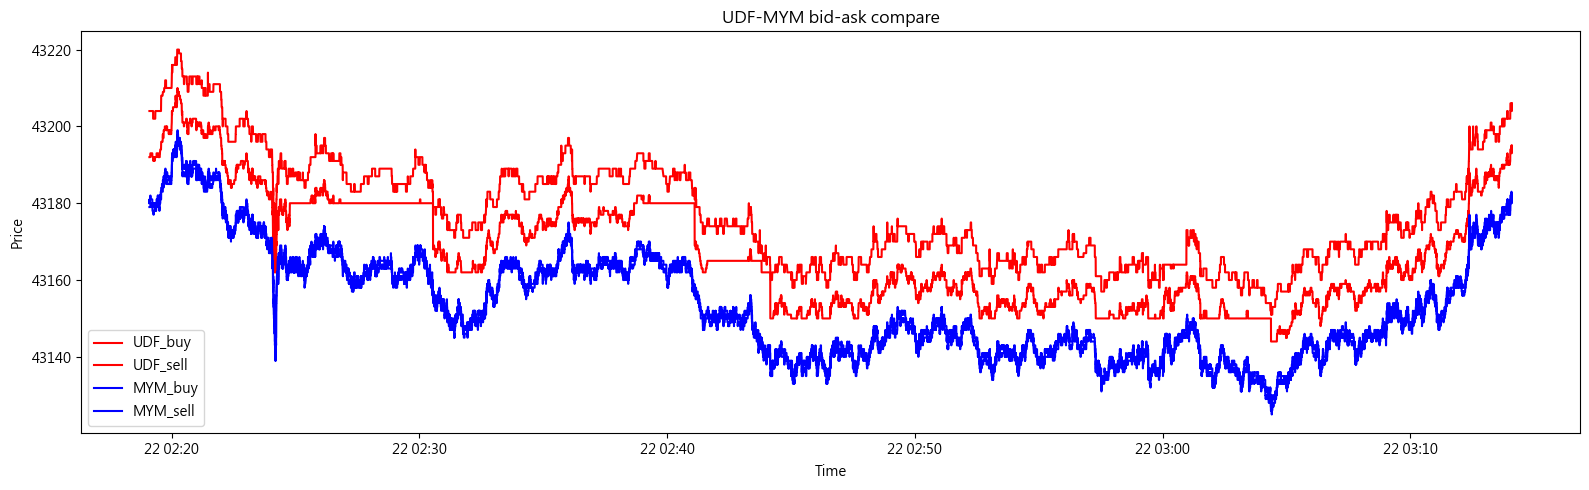

In [21]:
# %matplotlib qt
%matplotlib inline
plt.figure(figsize=(16, 5))
plt.plot(共同存檔_df['datetime'], 共同存檔_df["bid_SJ"], label="UDF_buy", color="red")
plt.plot(共同存檔_df['datetime'], 共同存檔_df["ask_SJ"], label="UDF_sell", color="red")
plt.plot(共同存檔_df['datetime'], 共同存檔_df["bid_IB"], label="MYM_buy", color="blue")
plt.plot(共同存檔_df['datetime'], 共同存檔_df["ask_IB"], label="MYM_sell", color="blue")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("UDF-MYM bid-ask compare")
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
# %matplotlib qt
# qt wx, gtk, osx, tk, empty uses default
%matplotlib inline
# 讀取 CSV 檔案
# data_SJ_UDF = pd.read_csv("datas/04.SJ記錄UDF掛單時間.csv")
data_SJ_UDF = pd.read_parquet("datas/04.SJ記錄UDF掛單時間-20241011-21-22點.pqt")[:-10]
# data_IB_MYM = pd.read_csv("datas/04.IB記錄MYM掛單時間.csv")
data_IB_MYM = pd.read_parquet("datas/04.IB記錄MYM掛單時間-20241011-21-22點.pqt")[:-10]
data_SJ_UDF['datetime'] = pd.to_datetime(data_SJ_UDF['datetime'])
data_IB_MYM['datetime'] = pd.to_datetime(data_IB_MYM['datetime'])
plt.figure(figsize=(16,8))
plt.plot(data_SJ_UDF["datetime"], data_SJ_UDF["bid"], label="UDF_buy",color="red")
plt.plot(data_SJ_UDF["datetime"], data_SJ_UDF["ask"], label="UDF_sell",color="red")
plt.plot(data_IB_MYM["datetime"], data_IB_MYM["bid"], label="MYM_buy",color="blue")
plt.plot(data_IB_MYM["datetime"], data_IB_MYM["ask"], label="MYM_sell",color="blue")
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('UDF-MYM bid-ask compare')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
SJ_df = pd.DataFrame(data_SJ_UDF)

In [10]:
IB_df=pd.DataFrame(data_IB_MYM)

In [12]:
merged_df = pd.merge(SJ_df, IB_df, on="datetime", how="outer", suffixes=("_SJ", "_IB"))
merged_df

,datetime,bid_SJ,ask_SJ,bid_IB,ask_IB
0,2024-10-11 21:06:26.441000,42741,42753,NaN,NaN
1,2024-10-11 21:06:28.816000,42741,42753,NaN,NaN
2,2024-10-11 21:06:30.191000,42741,42753,NaN,NaN
3,2024-10-11 21:06:30.941000,42741,42751,NaN,NaN
4,2024-10-11 21:06:32.442000,42741,42751,NaN,NaN
...,...,...,...,...,...
105237,2024-10-11 22:06:28.107220,NaN,NaN,42950.0,42951.0
105238,2024-10-11 22:06:28.118041,NaN,NaN,42950.0,42951.0
105239,2024-10-11 22:06:28.130223,NaN,NaN,42951.0,42951.0
105240,2024-10-11 22:06:28.145427,NaN,NaN,42951.0,42951.0


In [13]:
merged_df["datetime"] = pd.to_datetime(merged_df["datetime"])
merged_df = merged_df.set_index("datetime")
merged_df = merged_df.resample("1S").first()
merged_df

,bid_SJ,ask_SJ,bid_IB,ask_IB
datetime,,,,
2024-10-11 21:06:26,42741,42753,NaN,NaN
2024-10-11 21:06:27,None,None,NaN,NaN
2024-10-11 21:06:28,42741,42753,NaN,NaN
2024-10-11 21:06:29,None,None,42734.0,42736.0
2024-10-11 21:06:30,42741,42753,42734.0,42736.0
...,...,...,...,...
2024-10-11 22:06:24,None,None,42938.0,42940.0
2024-10-11 22:06:25,None,None,42937.0,42939.0
2024-10-11 22:06:26,None,None,42937.0,42938.0


In [14]:
reshaped_df = pd.DataFrame(
    {
        "SJ_bid": merged_df["bid_SJ"],
        "SJ_ask": merged_df["ask_SJ"],
        "IB_bid": merged_df["bid_IB"],
        "IB_ask": merged_df["ask_IB"],
    }
)
reshaped_df

,SJ_bid,SJ_ask,IB_bid,IB_ask
datetime,,,,
2024-10-11 21:06:26,42741,42753,NaN,NaN
2024-10-11 21:06:27,None,None,NaN,NaN
2024-10-11 21:06:28,42741,42753,NaN,NaN
2024-10-11 21:06:29,None,None,42734.0,42736.0
2024-10-11 21:06:30,42741,42753,42734.0,42736.0
...,...,...,...,...
2024-10-11 22:06:24,None,None,42938.0,42940.0
2024-10-11 22:06:25,None,None,42937.0,42939.0
2024-10-11 22:06:26,None,None,42937.0,42938.0


In [21]:
final_df = reshaped_df.ffill()
final_df =final_df.dropna()
final_df.to_parquet("datas/04.IB合併SJ記錄MYM掛單時間-20241011-21-22點.pqt")
final_df

,SJ_bid,SJ_ask,IB_bid,IB_ask
datetime,,,,
2024-10-11 21:06:29,42741,42753,42734.0,42736.0
2024-10-11 21:06:30,42741,42753,42734.0,42736.0
2024-10-11 21:06:31,42741,42753,42733.0,42736.0
2024-10-11 21:06:32,42741,42751,42733.0,42735.0
2024-10-11 21:06:33,42741,42751,42733.0,42735.0
...,...,...,...,...
2024-10-11 22:06:24,42929,42936,42938.0,42940.0
2024-10-11 22:06:25,42929,42936,42937.0,42939.0
2024-10-11 22:06:26,42929,42936,42937.0,42938.0


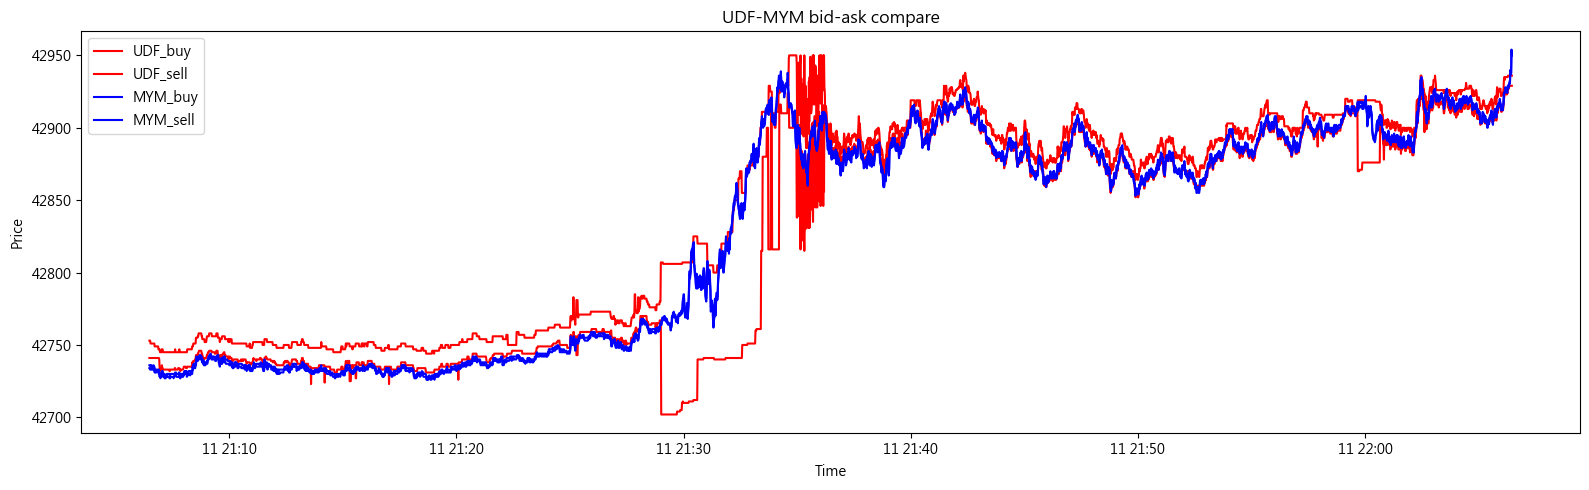

In [30]:
# %matplotlib qt
%matplotlib inline
plt.figure(figsize=(16, 5))
plt.plot(final_df.index, final_df["SJ_bid"], label="UDF_buy", color="red")
plt.plot(final_df.index, final_df["SJ_ask"], label="UDF_sell", color="red")
plt.plot(final_df.index, final_df["IB_bid"], label="MYM_buy", color="blue")
plt.plot(final_df.index, final_df["IB_ask"], label="MYM_sell", color="blue")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("UDF-MYM bid-ask compare")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
final_df